# Datascience

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

# Import

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

# Import Data set

In [2]:
kickstarter = pd.read_csv('dataset.csv', index_col=0)

# Découverte des données

In [3]:
# Basic info
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [5]:
kickstarter.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
kickstarter.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [4]:
kickstarter.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
num_var = ['backers']
float_var = ['goal', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
obj_var = ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
print(f'Les variables de type numérique sont les suivantes :\n\n{num_var}\n\n')
print(f'Les variables de type float sont les suivantes :\n\n{float_var}\n\n')
print(f'Les variables de type objet/catégorie sont les suivantes:\n\n{obj_var}')

Les variables de type numérique sont les suivantes :

['backers']


Les variables de type float sont les suivantes :

['goal', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


Les variables de type objet/catégorie sont les suivantes:

['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']


In [9]:
kickstarter.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


# Analyse des données manquantes ou dupliquées

In [11]:
duplicated_values = kickstarter.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


les features qui ont des données manquantes sont ['usd pledged', 'name']


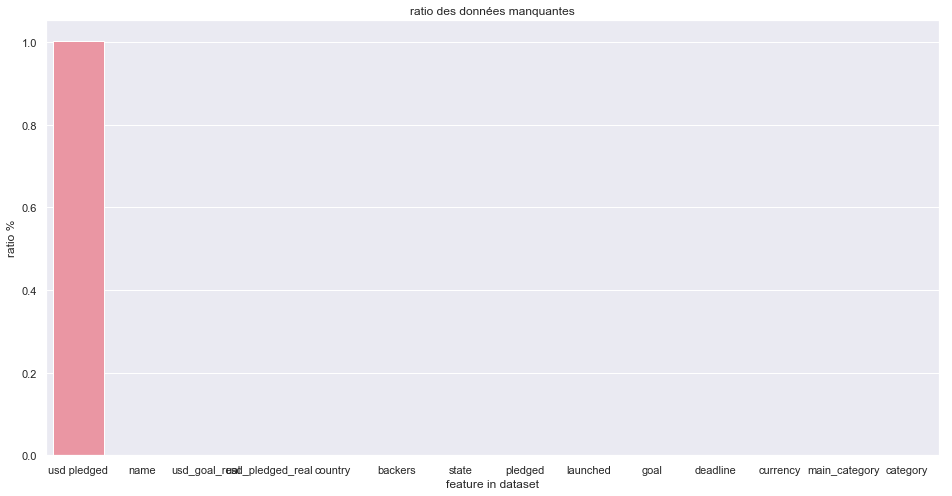

In [73]:
null_c = kickstarter.isnull().sum(axis=0).sort_values(ascending=False)*100/kickstarter.shape[0]
print("les features qui ont des données manquantes sont {}".format(list(null_c[null_c !=0].index)))
b = null_c.values
a = null_c.index
sns.barplot(x=a, y=b  )
plt.ylabel("ratio %")
plt.xlabel("feature in dataset")
plt.title("ratio des données manquantes")
plt.show()

In [64]:
kickstarter.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Il n'y a que pour la feature "usd pledged" que le ratio de données manquantes dépasse les 20%. 


Nous modifierons cela en remplaçant les valeurs nulles par la moyenne.

In [22]:
average_usd_pledged = kickstarter['usd pledged'].mean()

# Outliers

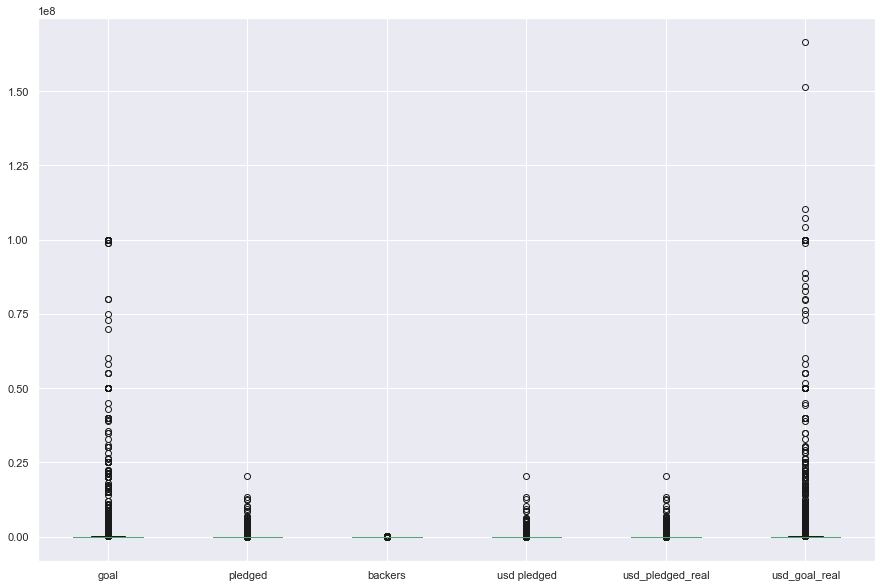

In [115]:
kickstarter.boxplot(figsize=(15,10))
plt.show()

Les outliers sont trop nombreux pour ne pas les inclure dans notre recherche.

# Analyse univariée

## Combien de projets ont été créés depuis le lancement de kickstarter ?

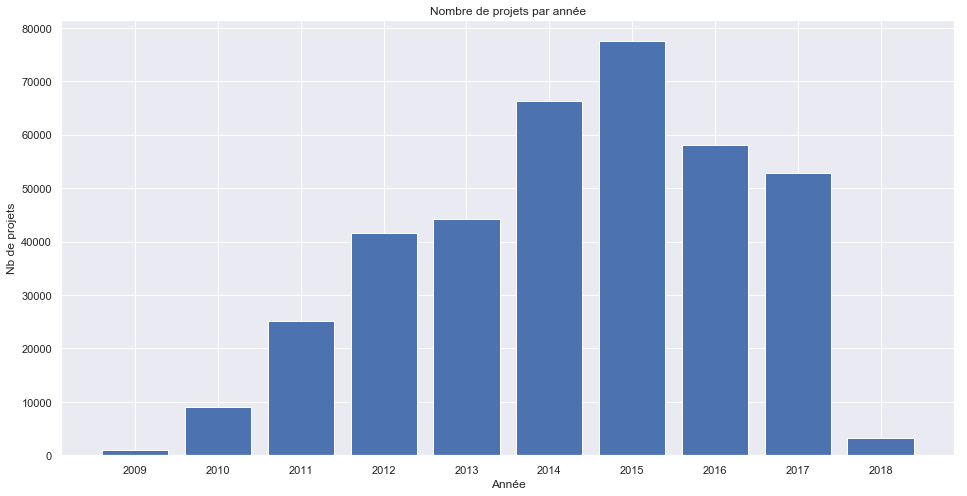

In [71]:
x_axis=(pd.to_datetime(kickstarter['deadline'])).dt.year.value_counts().index.values
y_axis=(pd.to_datetime(kickstarter['deadline'])).dt.year.value_counts()
ax=plt.bar(x_axis,y_axis, align='center')
plt.xticks(x_axis)
plt.xlabel('Année')
plt.ylabel('Nb de projets')
plt.title('Nombre de projets par année')
plt.show()

Depuis la création de Kickstarter, on observe que le nobre de projets a fortement augmenter jusqu'en 2015. Après 2015, la courbe s'inverse pour obtenir une chute drastique en 2018 (cela peut sans doute venir du fait que les données récoltées ont été prises en début d'année 2018).

## Regardons les états des différentes campagnes en 2018

In [43]:
results = kickstarter.state.value_counts()

35.38 % des campagnes ont le statut successful
52.22 % ont le statut failed
10.24 % ont le statut canceled
2.17 % des campagnes appartiennent à d'autres categories


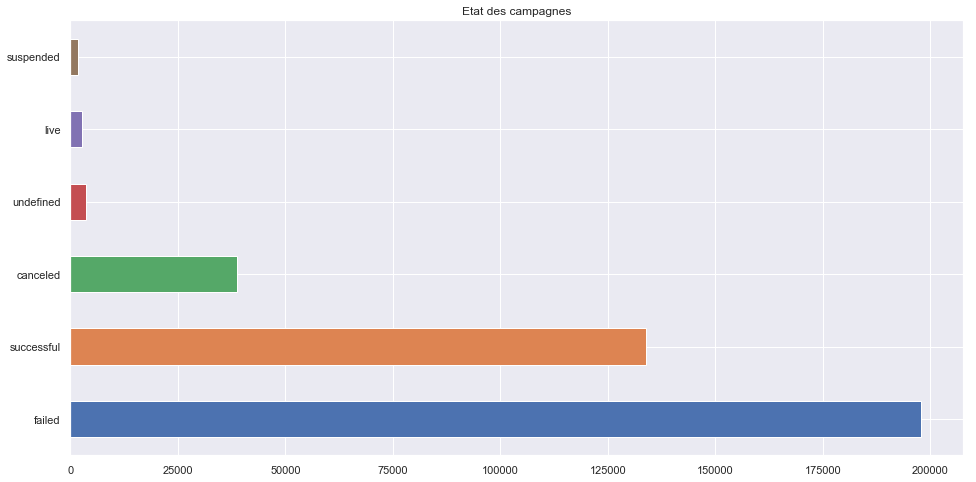

In [49]:
kickstarter['state'].value_counts().plot(kind='barh', figsize=(16,8), title='Etat des campagnes')

perc_successful = len(kickstarter[kickstarter['state'] == 'successful']) / len(kickstarter) * 100
perc_failed = len(kickstarter[kickstarter['state'] == 'failed']) / len(kickstarter) * 100
perc_canceled = len(kickstarter[kickstarter['state'] == 'canceled']) / len(kickstarter) * 100
perc_other = 100 - (perc_successful + perc_failed + perc_canceled)

print('{} % des campagnes ont le statut ''successful''\n\
{} % ont le statut ''failed''\n\
{} % ont le statut ''canceled''\n\
{} % des campagnes appartiennent à d\'autres categories'.format(round(perc_successful, 2), 
                                                     round(perc_failed, 2), 
                                                     round(perc_canceled, 2), 
                                                     round(perc_other, 2)))

Plus de la moitié des projets sur kickstarter n'ont pas réussi à atteindre leurs objectifs.

Cependant, on peut voir que 1 projet sur 3 a été succesful.

## Analysons les catégories

In [23]:
kickstarter.category.value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

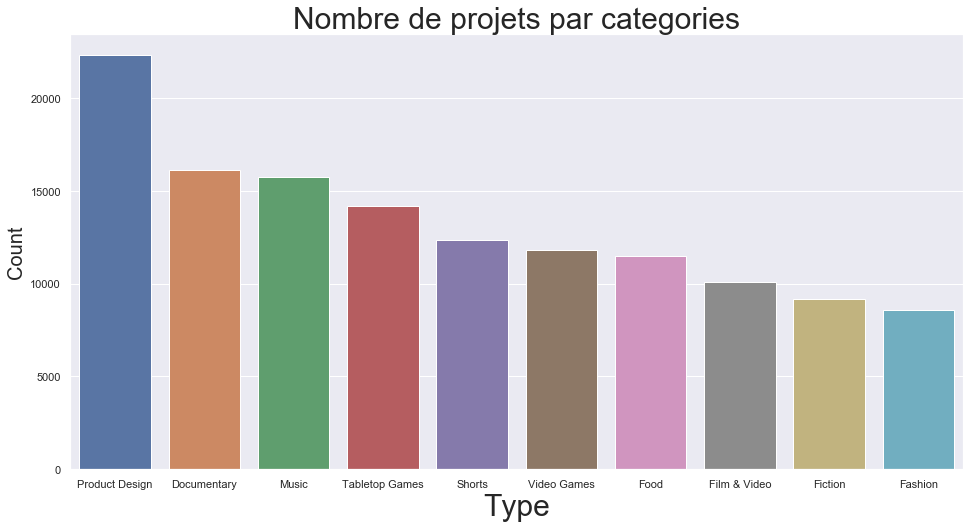

In [31]:
projet_bycat = sns.countplot('category', data=kickstarter, order=kickstarter['category'].value_counts().iloc[:10].index)
projet_bycat.axes.set_title('Nombre de projets par categories',fontsize=30)
projet_bycat.set_xlabel("Type",fontsize=30)
projet_bycat.set_ylabel("Count",fontsize=20)
plt.show()

## Quelles sont les top catégories ? (analyse de main_category)

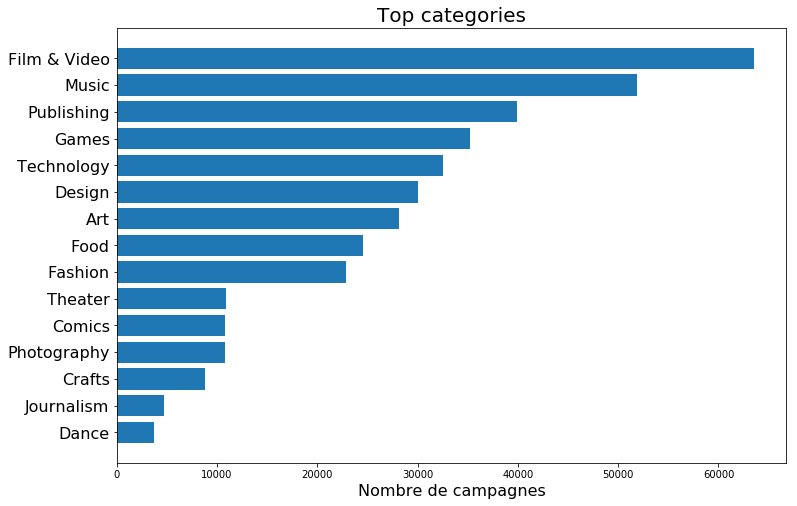

In [28]:
top_cat = kickstarter.main_category.value_counts()
x = top_cat.index.tolist()
y = top_cat

plt.figure(figsize=(12, 8)) 
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis()  # Afficher le top 1 en première position
plt.barh(np.arange(len(x)),y)
plt.title('Top categories', fontsize = 20)
plt.xlabel('Nombre de campagnes', fontsize = 16)
plt.show()

Les campagnes qui font parties de la catégorie "Film & Video" sont majoritaires au sein de kickstarter. Bien devant les catégories "Games" et "Technologies.


Regardons maintenant dans quelles catégories les projets ont plus de chance d'être 'succesful'.

In [36]:
win_cat = kickstarter.loc[kickstarter.state == 'successful', 'main_category'].value_counts()

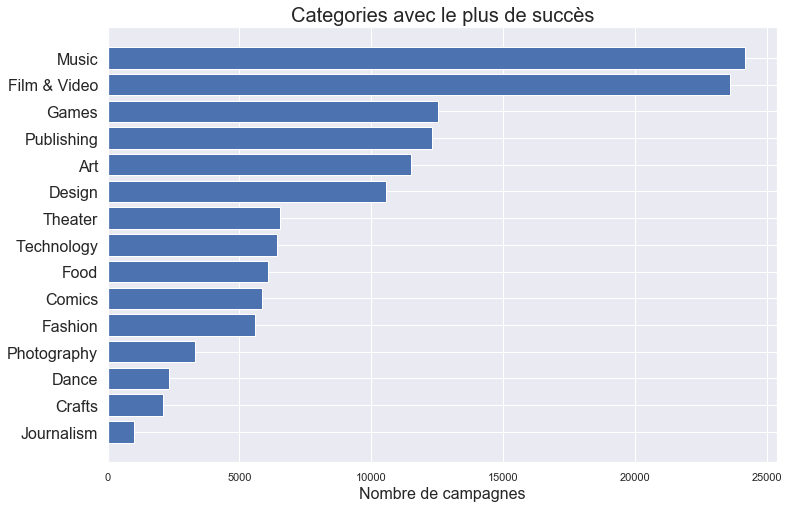

In [51]:
## Quelles catégories obtient le plus de succès pour les campagnes ?

x = win_cat.index.tolist()
y = win_cat

plt.figure(figsize=(12, 8))
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis()
plt.barh(np.arange(len(x)),y)
plt.title('Categories avec le plus de succès', fontsize = 20)
plt.xlabel('Nombre de campagnes', fontsize = 16)
plt.show()


Même si la catégorie "Film & Video" est la plus sollicitée sur kickstarter, on remarque que les projets musicaux sont les plus nombreux à atteindre leurs objectifs.

## Quelles sont donc les chances de réussites des campagnes selon leurs types ?

In [39]:
success_prob = kickstarter.loc[kickstarter.state=='successful','main_category'].value_counts()/kickstarter.main_category.value_counts()

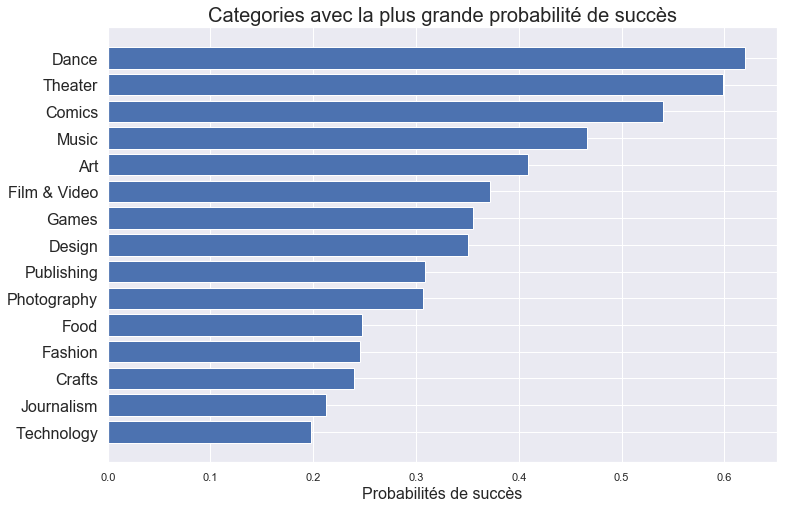

In [41]:
x = success_prob.sort_values().index.tolist()
y = success_prob.sort_values()

plt.figure(figsize=(12, 8))
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.barh(np.arange(len(x)),y)
plt.title('Categories avec la plus grande probabilité de succès', fontsize = 20)
plt.xlabel('Probabilités de succès', fontsize = 16)
plt.show()


On observe que les projets de 'Dance' ont plus de 60% de chances de succès.

A l'inverse, un projet 'Technology' aura moins de facilité à être succesful avec un pourcentage de succès d'environ 20%.

## Regardons d'où provient les différents projets sur kickstarter

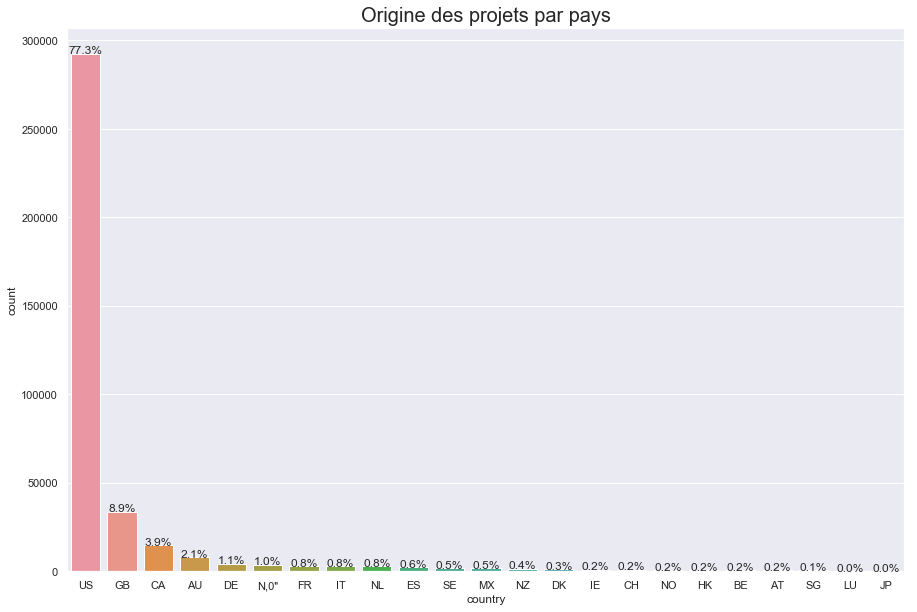

In [78]:
plt.figure(figsize=(15,10))
plot = sns.countplot(x = 'country', data = kickstarter, order = kickstarter['country'].value_counts().index)
total_country = len(kickstarter.index)
plt.title('Origine des projets par pays', fontsize = 20)

for p in plot.patches:        
    height = p.get_height()
    perc = (height / float(total_country))*100
    plot.text(p.get_x() + p.get_width()/2.,height,'%.1f'% (perc) +'%',ha="center") 

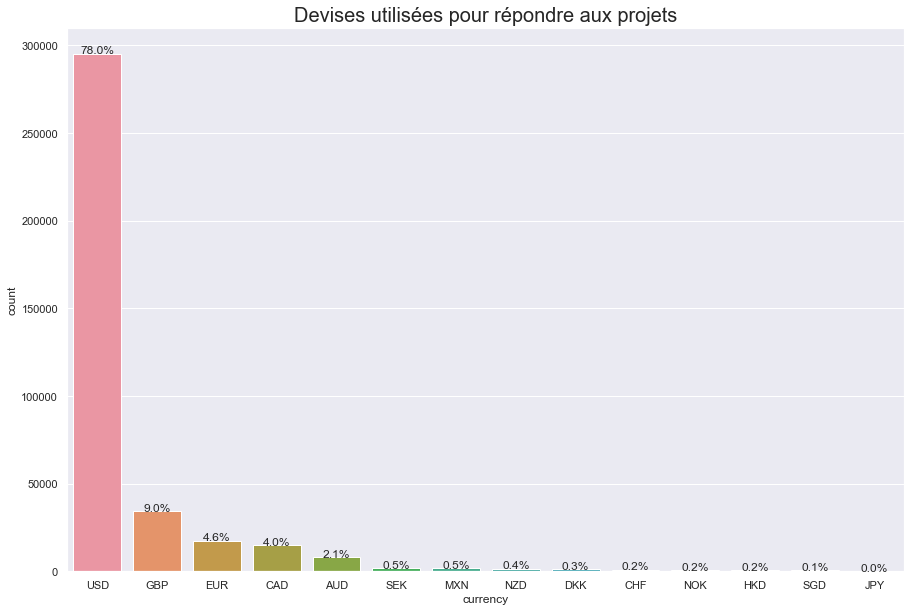

In [79]:
plt.figure(figsize=(15,10))
plot = sns.countplot(x = 'currency', data = kickstarter, order = kickstarter['currency'].value_counts().index)
total_currency = len(kickstarter.index)
plt.title('Devises utilisées pour répondre aux projets', fontsize = 20)

for p in plot.patches:        
    height = p.get_height()
    perc = (height / float(total_currency))*100
    plot.text(p.get_x() + p.get_width()/2.,height,'%.1f'% (perc) +'%',ha="center") 

Plus des 3/4 des projets sur kickstarter ont été créés aux USA.

De plus, le dollar et la livre sont les deux devises les plus présentes sur la plateforme (avec une large domination du USD).


Cette plateforme semble plus attiré les projets provenants de pays anglo-saxons.

# Analyse multivariée

In [91]:
kickcorr = kickstarter.corr(method="pearson", min_periods=1)
kickcorr

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
goal,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


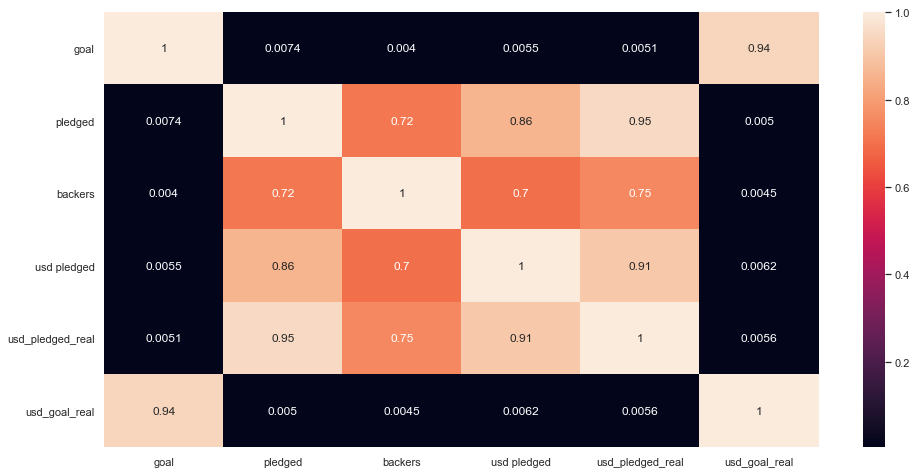

In [94]:
sns.heatmap(kickcorr, annot = True)

## Analyse du nombre de backers en fonction des états des projets

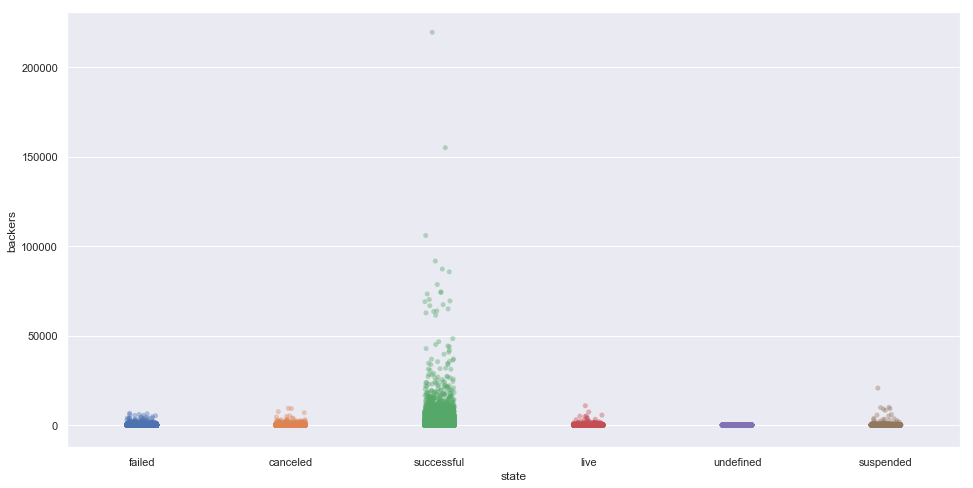

In [103]:
plot = sns.stripplot('state','backers',data=kickstarter,jitter = .1, alpha = .4)

Plus, il y a de backers, plus le projet aura une chance de passer au stade 'succesful'.

Text(0.5,1,'Représentation graphique main_category X usd_goal_real')

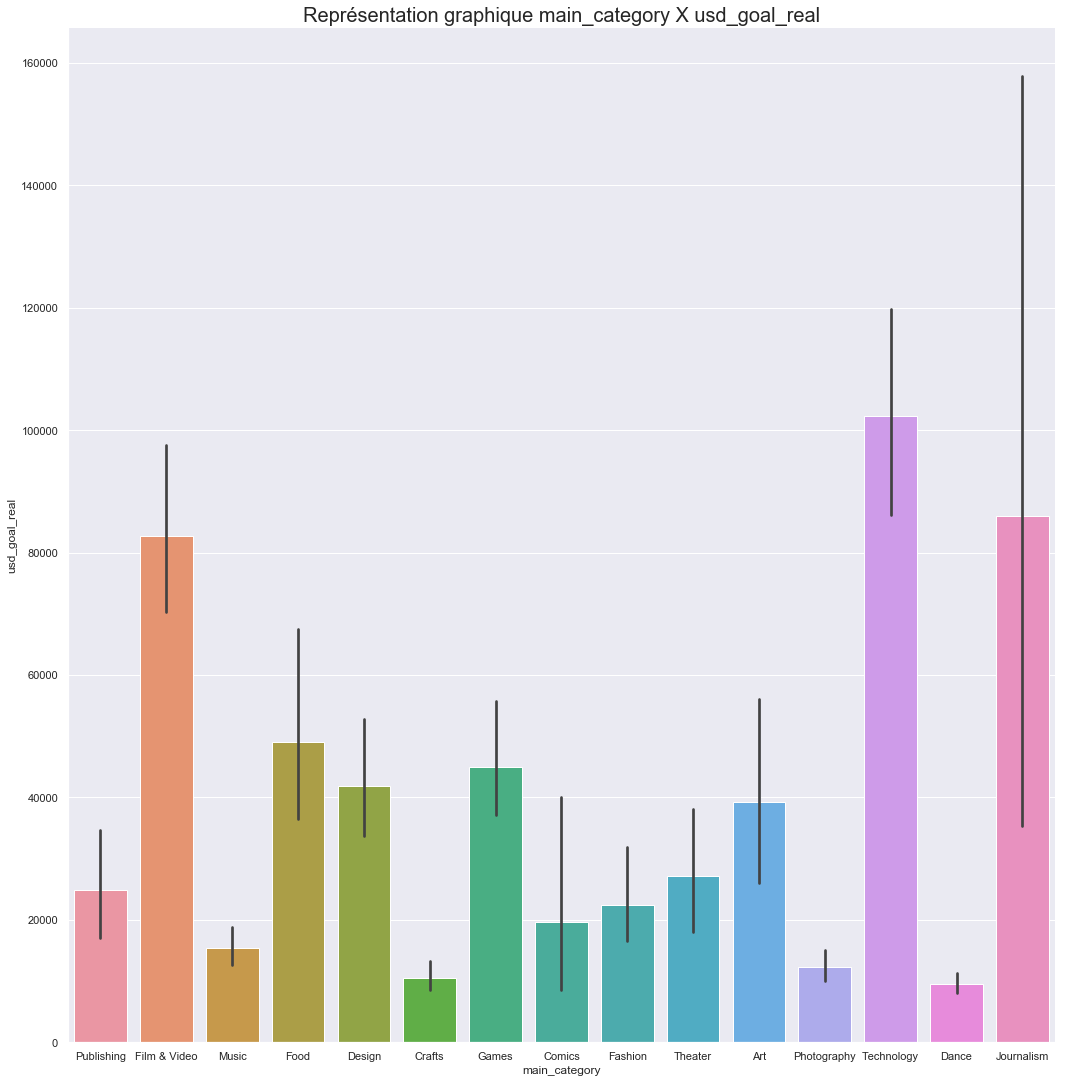

In [111]:
plot = sns.factorplot(x="main_category", y="usd_goal_real", data= kickstarter, kind="bar", size = 15)
plt.title("Représentation graphique main_category X usd_goal_real", fontsize = 20)

Les projets les plus couteux sont ceux présents dans les catégories 'Journalism', 'Technology' et 'Film & Video'.

Il serait judicieux de voir le nombre de succès/ échec en fonction de ces catégories.

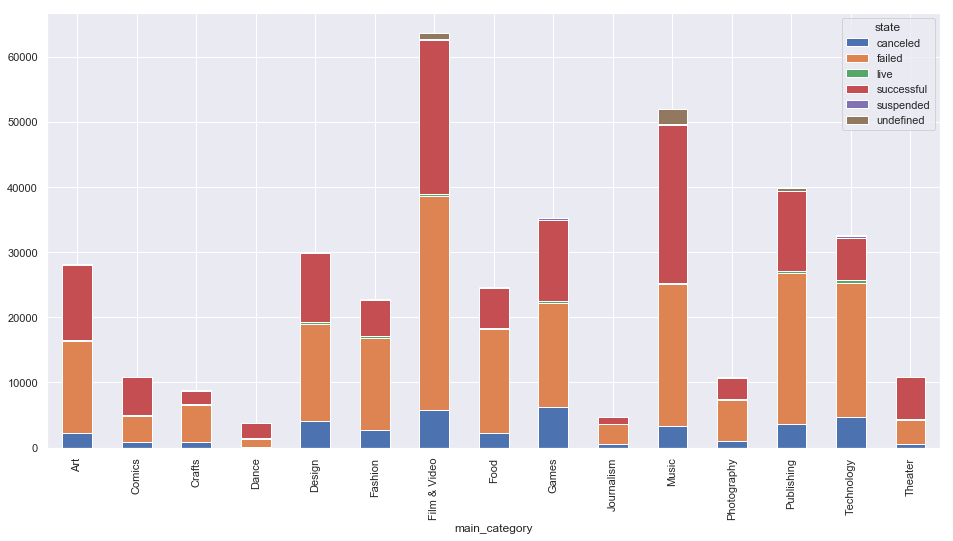

In [117]:
kik_sucCat = kickstarter.groupby('main_category').state.value_counts().sort_index().unstack()
kik_sucCat.plot.bar(stacked=True)
plt.show()

Selon ce graphique, les catégories qui ont le plus de succès sont 'Film & Video' et 'Music'. A l'inverse, la catégorie 'Journalism' a plus de projets avec le statut 'campagne non réussie' (canceled et failed confondues). 

Ainsi, avec ces deux graphs, nous pouvons dire qu'il n'y a pas de relation entre demandes de financements élevés et succès de la campagne

## Analysons les données temporelles

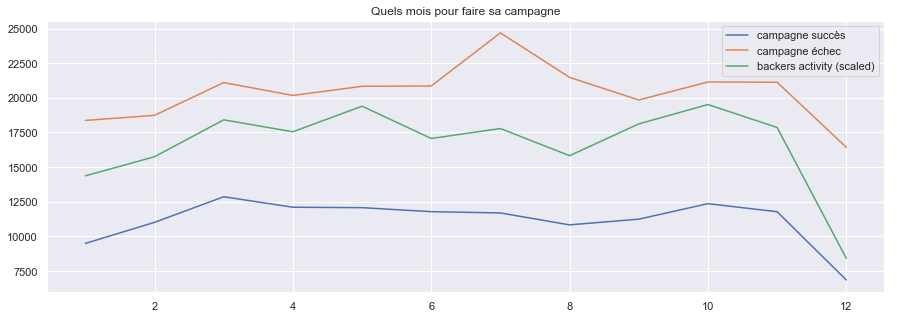

In [121]:
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])
kickstarter['month'] = kickstarter['launched'].dt.month
successfull_months = kickstarter[kickstarter['state'] == 'successful']['month'].value_counts().rename('campagne succès').sort_index()
unsuccessfull_months = kickstarter[kickstarter['state'] != 'successful']['month'].value_counts().rename('campagne échec').sort_index()
most_successful_months = pd.concat([successfull_months, unsuccessfull_months], axis=1, join='inner')
most_successful_months['backers activity (scaled)'] = kickstarter.groupby('month').aggregate(lambda x:x.sum()/200)['backers']
most_successful_months.plot(figsize=(15, 5), legend=True, title='Quels mois pour faire sa campagne')
plt.show()

Il serait le plus intéressant de réaliser son crowdfunding en mars et en octobre. Cependant, d'avril à août, il y a plus de risque de ne pas atteindre ses objectifs (surtout en juillet).

# Conclusion

- Sur Kickstarter, il y a de nombreux projets, mais la plupart n'arrive pas à atteindre leurs objectifs.
- Kickstarter est plus utilisé aux USA et en Grande Bretagne (suivis par d'autres pays anglo-saxons).
- Plus il y a de backers sur le projet, plus le projet aura des chances de succès.
- Les projets les plus couteux ne sont pas forcément ceux qui seront réalisés avec succès. 
- Pour avoir le plus de chances de succès, il faudrait lancer un projet musical.
- Enfin, il est conseillé de ne pas lancer son appel à fincancement en juillet. Les mois le splus intéressants sont en mars et en octobre.